# Homework 5- Steven Vaught

* [Newman 8.2](#problem2)
* [Newman 8.3](#problem3)
* [Newman 8.4](#problem4)
* [Newman 8.6](#problem6)
* [Newman 8.7](#problem7)
* [Newman 8.9](#problem9)
* [Newman 8.12](#problem12)
* [Newman 8.15](#problem15)

# IMPORTANT NOTE!!
The only the first animation run by the kernel will work. IDK why, but it looks like my animations don't work if you try and run every cell sequentially in the notebook. If you were wanting to check the animations yourself, you'll need to restart the kernel, and run the only the cells associated with that problem. 

Sorry for the inonvenience

# Newman 8.2 <a id='problem2'/>

### Part A
Write a program that solve the Lotka-Volterra equations using fourth order Runge Kutta method and makes a plot of both populations over time
### Part B
Describe what is happening to the populations

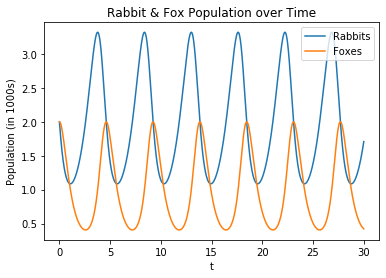

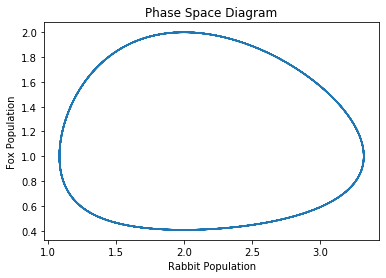

Phase Space plot shows that population is conserved (over short times)


In [3]:
"""
Newman Problem 8.2

Lotka Volterra Equations
"""
from math import sin
import numpy as np
import matplotlib.pyplot as plt

# Constants
alpha = 1
beta = 1
gamma = 1
delta = 2

# Initialization
a = 0.0
b = 30.0
N = 10000
h = (b-a)/N
tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []
x = y = 2.0

# Function declaration
dxdt = lambda x, y: alpha*x - beta*x*y
dydt = lambda x, y: gamma*x*y - delta*y

# Main Loop
for t in tpoints:
    xpoints.append(x)
    ypoints.append(y)
    xk1, yk1 = h*dxdt(x, y), h*dydt(x, y)
    xk2, yk2 = h*dxdt(x+0.5*xk1, y+0.5*yk1), h*dydt(x+0.5*xk1, y+0.5*yk1)
    xk3, yk3 = h*dxdt(x+0.5*xk2, y+0.5*yk2), h*dydt(x+0.5*xk2, y+0.5*yk2)
    xk4, yk4 = h*dxdt(x+xk3, y+yk3), h*dydt(x+xk3, y+yk3)
    x += (xk1+2*xk2+2*xk3+xk4)/6
    y += (yk1+2*yk2+2*yk3+yk4)/6

# Plotting Populations with Time
plt.plot(tpoints,xpoints, label='Rabbits')
plt.plot(tpoints,ypoints, label='Foxes')
plt.title("Rabbit & Fox Population over Time")
plt.xlabel("t")
plt.ylabel("Population (in 1000s)")
plt.legend()
plt.show()

# Plotting populations by each other
plt.plot(xpoints, ypoints)
plt.title("Phase Space Diagram")
plt.xlabel("Rabbit Population")
plt.ylabel("Fox Population")
plt.show()

print('Phase Space plot shows that population is conserved (over short times)')

# Newman 8.3 <a id='problem3'/>

### Part A
Write a program that solves the lorenz equations and make a plot of y as a function of time
### Part B
Make a plot of z against x (plot the strange attractor guy)

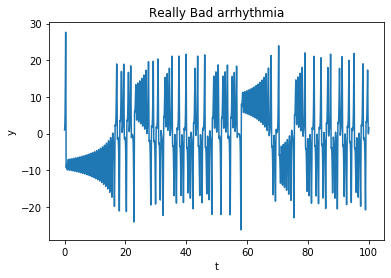

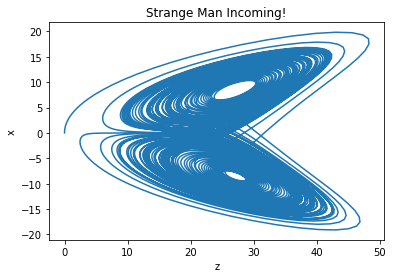

In [6]:
"""
Newman Problem 8.3

The Lorenz Equations
"""
import numpy as np
import matplotlib.pyplot as plt

# Constants
sigma = 10
r = 28
b = 8/3

# Function Declaration
def function(xyz):
    x = xyz[0]
    y = xyz[1]
    z = xyz[2]
    fx = sigma*(y - x)
    fy = r*x - y - x*z
    fz = x*y - b*z
    return np.array([fx, fy, fz], float)

# Initialization
A = 0.0
B = 100.0
N = 10000
h = (B - A)/N

tpoints = np.arange(A,B,h)
xpoints = []
ypoints = []
zpoints = []

xyz = np.array([0, 1, 0], float)

# Main Loop
for t in tpoints:
    # adding new point to each list
    xpoints.append(xyz[0])
    ypoints.append(xyz[1])
    zpoints.append(xyz[2])

    # calculating next point with RK4
    k1 = h*function(xyz)
    k2 = h*function(xyz+0.5*k1)
    k3 = h*function(xyz+0.5*k2)
    k4 = h*function(xyz+k3)
    xyz += (k1 + 2*k2 + 2*k3 + k4)/6


plt.plot(tpoints, ypoints)
plt.title('Really Bad arrhythmia')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

plt.plot(zpoints, xpoints)
plt.title('Strange Man Incoming!')
plt.xlabel('z')
plt.ylabel('x')
plt.show()


# Newman 8.4 <a id='problem4'/>

### Part A
Solve equations of motion for a nonlinear pendulum using RK4 & graph theta vs. time.
### Part B
create an animation of the motion of the pendulum

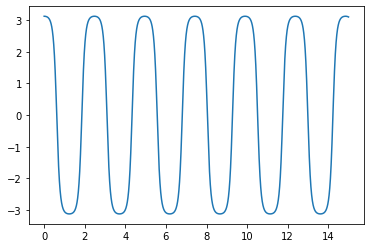

In [3]:
"""
Newman Problem 8.4

Nonlinear Pendulum
"""
import numpy as np
import matplotlib.pyplot as plt
from math import sin, pi

""" Part A +++++++++++++++++++++++++++++++++++++++++++++++++"""

# constant declaration
g = 9.81
l = 0.1

def f(r):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*sin(theta)
    return np.array([ftheta, fomega], float)

# Initialization
A = 0.0
B = 15.0
N = 10000
h = (B - A)/N

tpoints = np.arange(A,B,h)
theta_pts = []
omega_pts = []
r = np.array([179./180.*pi, 0], float)

# Main Loop
for t in tpoints:
    # adding new point to each list
    theta_pts.append(r[0])
    omega_pts.append(r[1])

    # calculating next point with RK4
    k1 = h*f(r)
    k2 = h*f(r+0.5*k1)
    k3 = h*f(r+0.5*k2)
    k4 = h*f(r+k3)
    r += (k1 + 2*k2 + 2*k3 + k4)/6

# Plotting theta vs. time
plt.plot(tpoints, theta_pts)
plt.show()

In [ ]:
from vpython import sphere, cylinder, rate, vector
from math import cos, sin, pi
from numpy import arange

# Pendulum declaration with VPython objects
s = sphere(pos=vector(1,0,0), radius=0.1)
c = cylinder(radius=0.05)

# only display every 4 RK steps
for theta in theta_pts[::4]:
    
    # screen update every 30th of a second
    rate(30)
    
    # update positions
    x = -cos(theta)
    y = sin(theta)
    s.pos = vector(y, x, 0)
    c.axis = vector(y, x, 0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Newman 8.6 <a id='problem6'/>

### Part A
make the substitution:

$$
\frac{dx}{dt} = v
$$

then the other first order equation is:

$$
\frac{dv}{dt} = -\omega^2x
$$

Write a program that solves these equations for some initial condidions and make a plot of x vs. time
### Part B
Increase the amplitude of the oscillatios and ensure that the period stays rougly the same
### Part C
Modify the program for the anharmonic oscillator:

$$
\frac{d^2x}{dt^2} = -\omega^3x
$$

### Part D
Plot velocity against position (make a phase space plot)
### Part E
Moddify the program for the Van Der Pol Oscilator:

$$
\frac{d^2x}{dt^2} -\mu(1-x^2)\frac{dx}{dt} + \omega^2x = 0
$$

Make another phase space plot

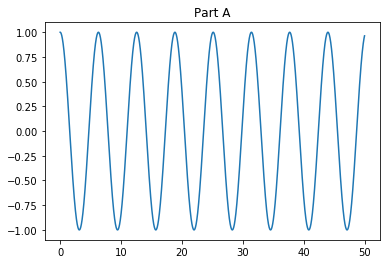

Period looks to be about ~ 6


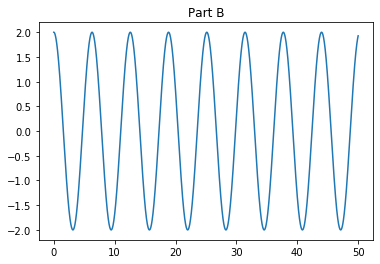

Period still looks to be about ~ 6


In [4]:
"""
Newman Problem 8.6

Harmonic and Anharmonic Oscillators
"""
import numpy as np
import matplotlib.pyplot as plt
from math import sin, pi


def runge_kutta(r, f, tpoints):
    """RK4 as a function so code isn't repetitive"""
    xpoints = []
    vpoints = []
    for t in tpoints:
        # adding new point to each list
        xpoints.append(r[0])
        vpoints.append(r[1])

        # calculating next point with RK4
        k1 = h*f(r)
        k2 = h*f(r+0.5*k1)
        k3 = h*f(r+0.5*k2)
        k4 = h*f(r+k3)
        r += (k1 + 2*k2 + 2*k3 + k4)/6  

    return xpoints, vpoints

""" Part A +++++++++++++++++++++++++++++++++++++++++++++++++"""

# constant declaration
omega = 1

# function definition for harmonic oscillator
def harmonic(r):
    x = r[0]
    v = r[1]
    fx = v
    fv = -omega*omega*x
    return np.array([fx, fv], float)

# Initialization
A = 0.0
B = 50.0
N = 10000
h = (B - A)/N

# declaring variables and RK4 call
tpoints = np.arange(A,B,h)
r = np.array([1, 0], float)
xpoints, vpoints = runge_kutta(r, harmonic, tpoints)

# Plotting xpoints vs. time
plt.plot(tpoints, xpoints)
plt.title('Part A')
plt.show()
print("Period looks to be about ~ 6")

""" Part B +++++++++++++++++++++++++++++++++++++++++++++++++"""

# variable declaration and RK4 call
r = np.array([2, 0], float)
xpoints, vpoints = runge_kutta(r, harmonic, tpoints)

# Plotting xpoints vs. time
plt.plot(tpoints, xpoints)
plt.title('Part B')
plt.show()
print('Period still looks to be about ~ 6')

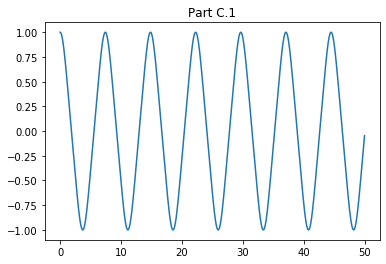

Period looks to be about ~ 7


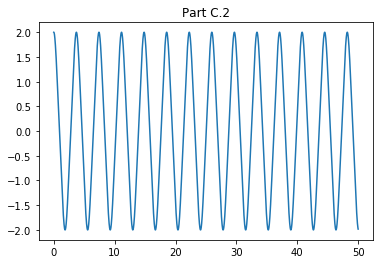

Period looks to be about ~ 3.5 now
The oscillator is oscillating faster at higher amplitudes


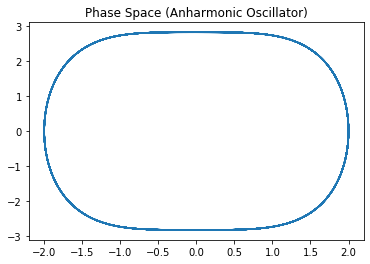

In [5]:
""" Part C.1 +++++++++++++++++++++++++++++++++++++++++++++++++"""

# function defined for anharmonic oscillator
def anharmonic(r):
    x = r[0]
    v = r[1]
    fx = v
    fv = -omega*omega*x*x*x
    return np.array([fx, fv], float)

# variable declaration and RK4 call
r = np.array([1, 0], float)
xpoints, vpoints = runge_kutta(r, anharmonic, tpoints)

# Plotting xpoints vs. time
plt.plot(tpoints, xpoints)
plt.title('Part C.1')
plt.show()
print("Period looks to be about ~ 7")

""" Part C.2 +++++++++++++++++++++++++++++++++++++++++++++++++"""

# variable declaration and RK4 call
r = np.array([2, 0], float)
xpoints, vpoints = runge_kutta(r, anharmonic, tpoints)

# Plotting theta vs. time
plt.plot(tpoints, xpoints)
plt.title('Part C.2')
plt.show()
print('Period looks to be about ~ 3.5 now')
print('The oscillator is oscillating faster at higher amplitudes')

""" Part D +++++++++++++++++++++++++++++++++++++++++++++++++"""

# Plotting v vs. time
plt.plot(xpoints, vpoints)
plt.title('Phase Space (Anharmonic Oscillator)')
plt.show()

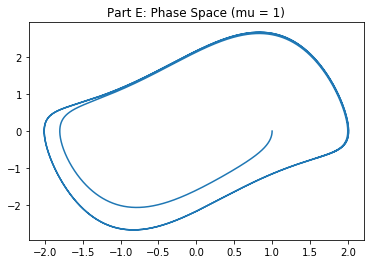

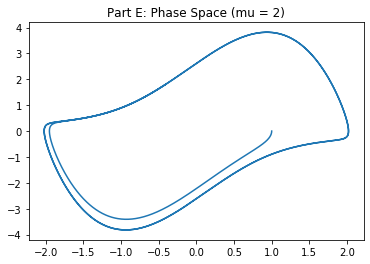

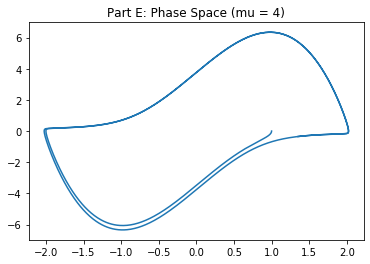

In [6]:
""" Part E +++++++++++++++++++++++++++++++++++++++++++++++++"""

# constant declaration
mu = 1

# function definition for Van Der Pol Oscillator
def van_der_pol(r):
    x = r[0]
    v = r[1]
    fx = v
    fv = mu*(1-x*x)*v - omega*omega*x
    return np.array([fx, fv], float)

# Initialization
A = 0.0
B = 20.0
N = 10000
h = (B - A)/N

''' Mu = 1'''

# variable declaration and RK4 call
tpoints = np.arange(A,B,h)
r = np.array([1, 0], float)
xpoints, vpoints = runge_kutta(r, van_der_pol, tpoints)

# Plotting phasespace
plt.plot(xpoints, vpoints)
plt.title('Part E: Phase Space (mu = 1)')
plt.show()

''' Mu = 2'''

# variable declaration and RK4 call
mu = 2
r = np.array([1, 0], float)
xpoints, vpoints = runge_kutta(r, van_der_pol, tpoints)

# Plotting phasespace
plt.plot(xpoints, vpoints)
plt.title('Part E: Phase Space (mu = 2)')
plt.show()

''' Mu = 4'''

# variable declaration and RK4 call
mu = 4
r = np.array([1, 0], float)
xpoints, vpoints = runge_kutta(r, van_der_pol, tpoints)

# Plotting phasespace
plt.plot(xpoints, vpoints)
plt.title('Part E: Phase Space (mu = 4)')
plt.show()

# Newman 8.7 <a id='problem7'/>

### Part A
Derive equations of motion for a cannonball with drag
### Part B
Solve the equations using a technique learned (any?) and plot the trajectory of the cannonball (x vs y)
### Part C
Experiment with the program to determine how mass of the cannonball affects the distance travelled (x-direction)

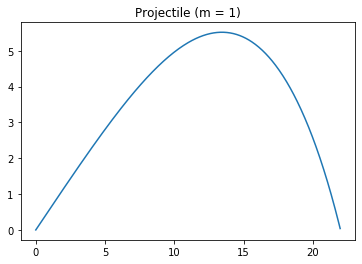

Distance travelled is ~ 21.97 meters


In [7]:
"""
Newman Problem 8.7

Trajectory with Air Resistance
"""
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, pi, sqrt

""" Part A ++++++++++++++++++++++++++++++++++++++++++++++++"""

# constant declaration
m = 1
R = 0.08
rho = 1.22
c = 0.47
v = 100
theta = 30*pi/180.
g = 9.81

def func(r):
    # unpacking array
    x, y = r[0], r[1]
    vx, vy = r[2], r[3]

    # intermediate calculations
    _v = sqrt(vx*vx + vy*vy)
    _f = 1/2*pi*R**2*rho*c*_v

    # New values and return array
    fx, fy = vx, vy
    fvx = -_f*vx*_v/m
    fvy = -_f*vy*_v/m - g
    return np.array([fx, fy, fvx, fvy], float)

# Initialization
A = 0.0
B = 5
N = 1000
h = (B - A)/N

tpoints = np.arange(A,B,h)
xpoints = []
ypoints = []
vxpoints = []
vypoints = []
r = np.array([0, 0, v*cos(theta), v*sin(theta)], float)

# Main Loop
for t in tpoints:
    # adding new point to each list
    xpoints.append(r[0])
    ypoints.append(r[1])
    vxpoints.append(r[2])
    vypoints.append(r[3])

    # calculating next point with RK4
    k1 = h*func(r)
    k2 = h*func(r+0.5*k1)
    k3 = h*func(r+0.5*k2)
    k4 = h*func(r+k3)
    r += (k1+2*k2+2*k3+k4)/6.

    # break loop when projectile reaches y=0
    if r[1] < 0:
        break

# plotting and stuff
plt.plot(xpoints, ypoints)
plt.title('Projectile (m = 1)')
plt.show()
print(f'Distance travelled is ~ {xpoints[-1]:0.2f} meters')

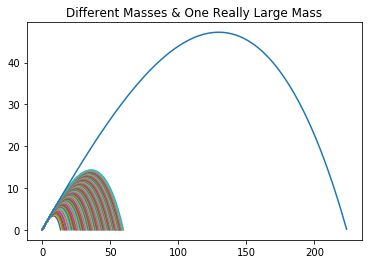

Larger masses travel further
This makes sense because deceleration is inversely proportional to mass


In [8]:
""" Part B ++++++++++++++++++++++++++++++++++++++++++++++++"""

# Initialization
A = 0.0
B = 10
N = 1000
h = (B - A)/N

# Function redefined to take mass as argument
def func(r, m):
    # unpacking array
    x, y = r[0], r[1]
    vx, vy = r[2], r[3]

    # intermediate calculations
    _v = sqrt(vx*vx + vy*vy)
    _f = 1/2*pi*R**2*rho*c*_v

    # New values and return array
    fx, fy = vx, vy
    fvx = -_f*vx*_v/m
    fvy = -_f*vy*_v/m - g
    return np.array([fx, fy, fvx, fvy], float)

''' Plot solution for a bunch of masses '''

for m in np.arange(.5, 5, .05):

    # initialization
    xpoints = []
    ypoints = []
    r = np.array([0, 0, v*cos(theta), v*sin(theta)], float)

    # RK4 Loop
    for t in tpoints:
        # adding new point to each list
        xpoints.append(r[0])
        ypoints.append(r[1])

        # calculating next point with RK4
        k1 = h*func(r, m)
        k2 = h*func(r+0.5*k1, m)
        k3 = h*func(r+0.5*k2, m)
        k4 = h*func(r+k3, m)
        r += (k1+2*k2+2*k3+k4)/6.

        # break loop when projectile reaches y=0
        if r[1] < 0:
            break

    # plotting and stuff
    plt.plot(xpoints, ypoints)

'''Plot solution for one really big mass'''

# initialization
xpoints = []
ypoints = []
r = np.array([0, 0, v*cos(theta), v*sin(theta)], float)

# RK4 Loop
for t in tpoints:
    # adding new point to each list
    xpoints.append(r[0])
    ypoints.append(r[1])

    # calculating next point with RK4
    k1 = h*func(r, 50)
    k2 = h*func(r+0.5*k1, 50)
    k3 = h*func(r+0.5*k2, 50)
    k4 = h*func(r+k3, 50)
    r += (k1+2*k2+2*k3+k4)/6.

    # break loop when projectile reaches y=0
    if r[1] < 0:
        break

# plotting and stuff
plt.plot(xpoints, ypoints)
    
# show the results
plt.title('Different Masses & One Really Large Mass')
plt.show()
print('Larger masses travel further')
print('This makes sense because deceleration is inversely proportional to mass')


# Newman 8.9 <a id='problem9'/>

### Part A
Solve the equations of motion for the masses using RK4, and plot the displacements for each mass as a function of time on the same plot (for 20s)
### Part B
Create an animation of the movement of the masses

(10,)


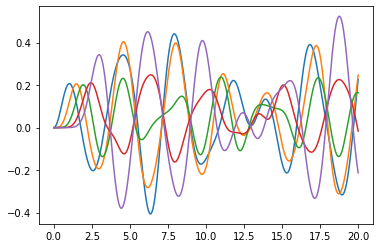

In [1]:
"""
Newman Problem 8.9

Vibration in 1-D System
"""
import numpy as np
import matplotlib.pyplot as plt
from math import cos


# setting constnats
m = 1
k = 6
omega = 2
pts = 5

""" Part A ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++"""

def rk4(r_init, func, t0, t, N):
    '''rk4 in a function. simple.'''

    # function initialization
    h = (t-t0)/N
    tpoints = np.arange(t0,t,h)
    xmatrix = np.empty(tpoints.shape+r_init.shape, float)
    r = r_init

    for i, e in enumerate(tpoints):
        # adding new position for each mass
        xmatrix[i] = r

        # calculating next point with RK4
        k1 = h*func(r, e)
        k2 = h*func(r+0.5*k1, e+0.5*h)
        k3 = h*func(r+0.5*k2, e+0.5*h)
        k4 = h*func(r+k3, e+h)
        r += (k1 + 2*k2 + 2*k3 + k4)/6

    return xmatrix, tpoints

        
def function(r, t):
    '''
    iterates to next diff eq. value 
    used with rk4
    '''
    # unpack argument vector
    N = len(r)//2
    xs = r[:N]
    vs = r[N:]

    # create return array and set new elements
    new_r = np.empty(r.shape, float)

    # new positions
    new_r[:N] = vs 

    # new end velocities
    new_r[N] = k*(xs[1] - xs[0])/m + cos(omega*t)/m
    new_r[-1] = k*(xs[-2] - xs[-1])/m 

    # new middle velocities
    for i in range(1, N-1):
        new_r[i+N] = k*(xs[i+1] - xs[i])/m + k*(xs[i-1] - xs[i])/m

    # return statement
    return np.array(new_r, float)


def display(solutions, tpoints):
    '''displays all solutions in a plot'''
    print(solutions[0].shape)
    for i in range(pts):
        xi = solutions[:,i]
        plt.plot(tpoints, xi)
    plt.show()


# calling functions and plotting
r = np.zeros(2*pts, float)
solutions, tpoints = rk4(r, function, 0, 20, 1000)
display(solutions, tpoints)


In [2]:
""" Part B ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++"""
from vpython import sphere, vector, rate


# generate spheres for animation
objects = []
sep = 2
length = pts*sep
for i in range(pts):
    rest_pos = sep*i - (length - sep)/2
    objects.append(sphere(pos = vector(rest_pos, 0, 0), radius=0.1))

# animate stuff
for i in range(len(solutions)):
    rate(100)
    for j in range(pts):
        rest_pos = sep*j - (length - sep)/2
        objects[j].pos = vector(rest_pos + solutions[i][j], 0, 0)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Newman 8.12 <a id='problem12'/>

### Part A
Write a program to calculate the orbit of earth using the Verlet method
### Part B
Calculate Potential & Kinetic energy at each point, and make plot showing each as a function of time (along with total energy)
### Part C
Plot only total energy w.r.t. time and see that there is a variation in energy over the short term, but energy is conserved over longer timescales

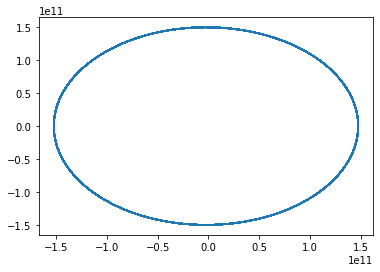

In [9]:
"""
Newman Problem 8.12

Orbit of the Earth
"""
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi


# constants
# stuff converted to years
G = 6.6738*1.e-11*(3.1709*1.e8)**2  # m^3/kg/year^2
M = 1.9891*1.e30                    # kg
m = 5.972*1.e24                     # kg
p_vel = 3.0287*1.e4*3.1709*1.e8     # m/year
p_dis = 1.4710*1.e11                # m
h = 0.000114155                     # 1 hour in years


""" Part A ++++++++++++++++++++++++++++++++++++++++++++++"""

def verlet(f, t0, tf):
    '''verlet method in a function
    
    returns tuple:
        (xpoints, ypoints, vxpoints, vypoints)
    '''
    # function initialization
    tpoints = np.arange(t0,tf,h)
    r = np.array([p_dis, 0, 0, p_vel], float)

    # empty lists for each timestep value
    xpoints, ypoints = [], []
    vxpoints, vypoints = [], []

    # calculate half steps
    vx_mid = r[2] + h*f(r)[2]/2.
    vy_mid = r[3] + h*f(r)[3]/2.

    for t in tpoints:
        # adding new positions and velocities
        xpoints.append(r[0])
        ypoints.append(r[1])
        vxpoints.append(r[2])
        vypoints.append(r[3])

        # calculate positions
        r[0] += h*vx_mid
        r[1] += h*vy_mid

        # calculate k
        k = h*f(r)

        # calculate velocities
        r[2] = vx_mid + k[2]/2.
        r[3] = vy_mid + k[3]/2.

        # update half steps
        vx_mid += k[2]
        vy_mid += k[3]

    return xpoints, ypoints, vxpoints, vypoints


def function(r):
    '''
    iterates to next diff eq. value 
    used with verlet method

    returns array:
        [x, y, vx, vy]
    '''
    # unpack argument vector
    x, y = r[0], r[1]
    vx, vy = r[2], r[3]

    # new positions
    fx, fy = vx, vy

    # new velocities
    denom = sqrt(x*x + y*y)**3
    fvx = -G*M*x/denom
    fvy = -G*M*y/denom

    # return statement
    return np.array([fx, fy, fvx, fvy], float)


# initialization of earth at Perihelion & call to Verlet method
xpoints, ypoints, vxpoints, vypoints = verlet(function, 0, 4)

# Plotting
plt.plot(xpoints, ypoints)
plt.show()

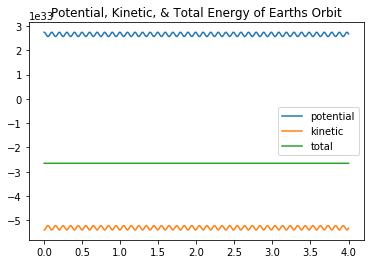

In [10]:
""" Part B ++++++++++++++++++++++++++++++++++++++++++++++"""

def verlet_energy(f, t0, tf):
    '''verlet method in a function
    
    returns tuple:
        (xpoints, ypoints, vxpoints, vypoints)
    '''
    # function initialization
    tpoints = np.arange(t0,tf,h)
    r = np.array([p_dis, 0, 0, p_vel], float)

    # empty lists for each timestep value
    xpoints, ypoints = [], []
    potential, kinetic = [], []

    # calculate half steps
    vx_mid = r[2] + h*f(r)[2]/2.
    vy_mid = r[3] + h*f(r)[3]/2.

    for t in tpoints:
        # adding new positions and energies
        xpoints.append(r[0])
        ypoints.append(r[1])
        potential.append(-G*M*m/sqrt(r[0]**2 + r[1]**2)/(3.1709*1.e8)**2)
        kinetic.append(.5*m*(r[2]**2 + r[3]**2)/(3.1709*1.e8)**2)

        # calculate positions
        r[0] += h*vx_mid
        r[1] += h*vy_mid

        # calculate k
        k = h*f(r)

        # calculate velocities
        r[2] = vx_mid + k[2]/2.
        r[3] = vy_mid + k[3]/2.

        # update half steps
        vx_mid += k[2]
        vy_mid += k[3]

    return xpoints, ypoints, kinetic, potential, tpoints


# initialization of earth at Perihelion & call to Verlet method
_,_, potential, kinetic, tpoints = verlet_energy(function, 0, 4)
ttl_energy = np.array(potential, float) + np.array(kinetic, float)

# Plotting
plt.plot(tpoints, potential, label='potential')
plt.plot(tpoints, kinetic, label='kinetic')
plt.plot(tpoints, ttl_energy, label = 'total')
plt.title('Potential, Kinetic, & Total Energy of Earths Orbit')
plt.legend()
plt.show()

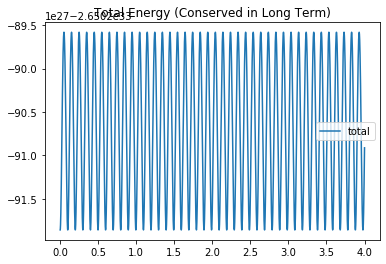

In [12]:
""" Part C ++++++++++++++++++++++++++++++++++++++++++++++"""

plt.plot(tpoints, ttl_energy, label = 'total')
plt.title('Total Energy (Conserved in Long Term)')
plt.legend()
plt.show()

# Newman 8.15 <a id='problem15'/>

### Part A
Derive an expression for total energy of the system in terms of system variables
### Part B
Solve the equations of motion for the system with RK4 and plot the energy over time
### Part C
Make an animation of the motion for the double pendulum

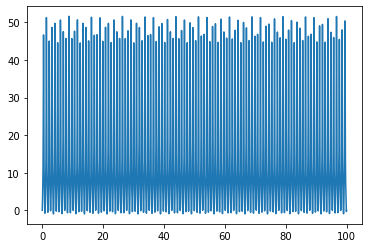

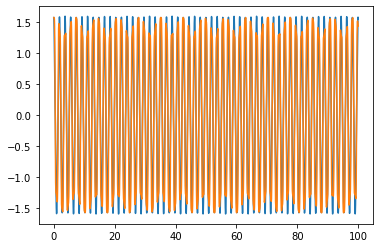

Variance is about ~-9.031e-04 Joules


In [1]:
"""
Newman Problem 8.15

The Double Pendulum
"""
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, pi


# Constants
g = 9.81 
l = 0.4
t0 = 0
tf = 100
N = 10000.


""" Part A ++++++++++++++++++++++++++++++++++++++++++++++++"""

def rk4(r_init, func, tpoints):
    '''rk4 in a function. simple.'''

    # function initialization
    h = tpoints[2] - tpoints[1]
    r = r_init
    o1points, o2points = [], []
    w1points, w2points = [], []
    epoints = []

    for t in tpoints:
        # adding new angles
        o1points.append(r[0])
        o2points.append(r[1])

        # adding new velocities
        w1points.append(r[2])
        w2points.append(r[3])

        # adding energy
        epoints.append(
            .5*1*(r[2]**2 + r[3]**2) - g*l*(2*cos(r[0]) + cos(r[1]))
        )

        # calculating next point with RK4
        k1 = h*func(r)
        k2 = h*func(r+0.5*k1)
        k3 = h*func(r+0.5*k2)
        k4 = h*func(r+k3)
        r += (k1 + 2*k2 + 2*k3 + k4)/6

    return (
        o1points,
        o2points,
        w1points,
        w2points,
        epoints
    )


def function(r):
    # unpacking r vector
    O1 = r[0]
    O2 = r[1]
    w1 = r[2]
    w2 = r[3]

    # setting new angles
    ft1 = w1
    ft2 = w2

    # setting new angular velocities
    fo1 = -(w1**2*sin(2*O1-2*O2) + 2*w2**2*sin(O1 - O2) + g/l*(sin(O1 - 2*O1) + 3*sin(O1)))/(
        3 - cos(2*O1 - 2*O2)
    ) 
    fo2 = (4*w1**2*sin(O1 - O2) + w2**2*sin(2*O1 - 2*O2) + 2*g/l*(sin(2*O1 - O2) - sin(O2)))/(
        3 - cos(2*O1 - 2*O2)
    )

    return np.array([ft1, ft2, fo1, fo2], float)


# initial conditions and functions calls
h = (tf-t0)/N
t = np.arange(t0, tf, h)
R = np.array([pi/2., pi/2., 0, 0], float)
theta1,theta2,_,_,epoints = rk4(R, function, t)

# plotting stuff
plt.plot(t, epoints)
plt.show()

plt.plot(t, theta1)
plt.plot(t, theta2)
plt.show()

# estimating variation in energy
print(f'Variance is about ~{epoints[-1] - epoints[0]:0.3e} Joules')

In [2]:
""" Part B ++++++++++++++++++++++++++++++++++++++++++++++++"""
from vpython import sphere, cylinder, rate, vector

# Pendulum declaration with VPython objects
s1 = sphere(pos=vector(1,0,0), radius=0.1)
c1 = cylinder(radius=0.05)
s2 = sphere(pos=vector(2,0,0), radius=0.1)
c2 = cylinder(radius=0.05)

# only display every 4 RK steps
for t1, t2 in zip(theta1, theta2):

    # screen update every 30th of a second
    rate(30)
    
    # update position of top pendulum
    x = -cos(t1)
    y = sin(t1)
    s1.pos = vector(y, x, 0)
    c1.axis = vector(y, x, 0)
    c2.pos = vector(y, x, 0)

    # update position of bottom pendulum
    cx, cy = -cos(t2), sin(t2)
    x += cx
    y += cy
    s2.pos = vector(y, x, 0)
    c2.axis = vector(cy, cx, 0)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>